In [3]:
  #make sure fastai is up to date 
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/dog_breed_recog/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!pip install "torch==1.4" "torchvision==0.5.0"

ERROR: Operation cancelled by user


In [7]:
from fastai.vision import *

In [8]:
(Path(root_path)/'breeds').mkdir(parents=True, exist_ok=True)

In [9]:
proj_path = 'gdrive/My Drive/dog_breed_recog/breeds/'

In [10]:
folders = ['maltese','greyhound','labrador_retriever','bichon_frise','golden_retriever','german_shepherd','bulldog','poodle','beagle','dachshund','dobermann','rottweiler','pomeranian','Dalmatian']

In [11]:
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [12]:
p_path = Path(proj_path)

In [13]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [14]:
data.classes

['Dalmatian',
 'beagle',
 'bichon_frise',
 'bulldog',
 'dachshund',
 'dobermann',
 'german_shepherd',
 'golden_retriever',
 'greyhound',
 'labrador_retriever',
 'maltese',
 'pomeranian',
 'poodle',
 'rottweiler']

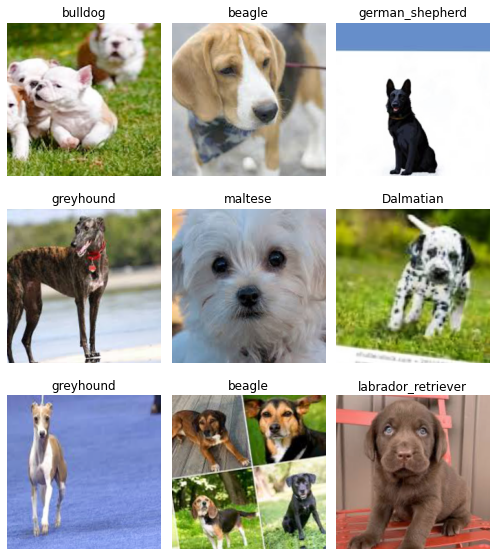

In [15]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Dalmatian',
  'beagle',
  'bichon_frise',
  'bulldog',
  'dachshund',
  'dobermann',
  'german_shepherd',
  'golden_retriever',
  'greyhound',
  'labrador_retriever',
  'maltese',
  'pomeranian',
  'poodle',
  'rottweiler'],
 14,
 1399,
 349)

In [17]:
#create cnn_learner object
#use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [18]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.662398,0.532477,0.174785,00:13
1,1.454984,0.332539,0.106017,00:13
2,0.991747,0.320700,0.120344,00:13
3,0.715917,0.384723,0.131805,00:13
4,0.552014,0.293269,0.100287,00:13
5,0.436491,0.268772,0.083095,00:13
6,0.365270,0.259959,0.080229,00:13
7,0.304194,0.258133,0.083095,00:13


In [19]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/dog_breed_recog/breeds/models/model1_34.pth')

In [20]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


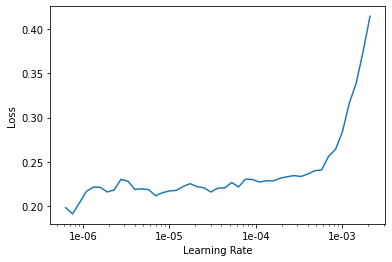

In [21]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [22]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.207213,0.259628,0.080229,00:14
1,0.190679,0.263825,0.088825,00:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


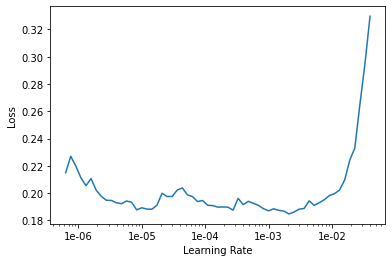

In [23]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.save('model2_34')

In [25]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

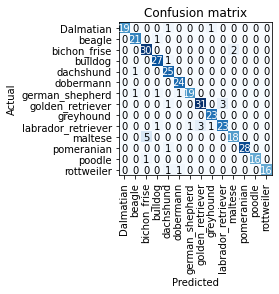

In [26]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

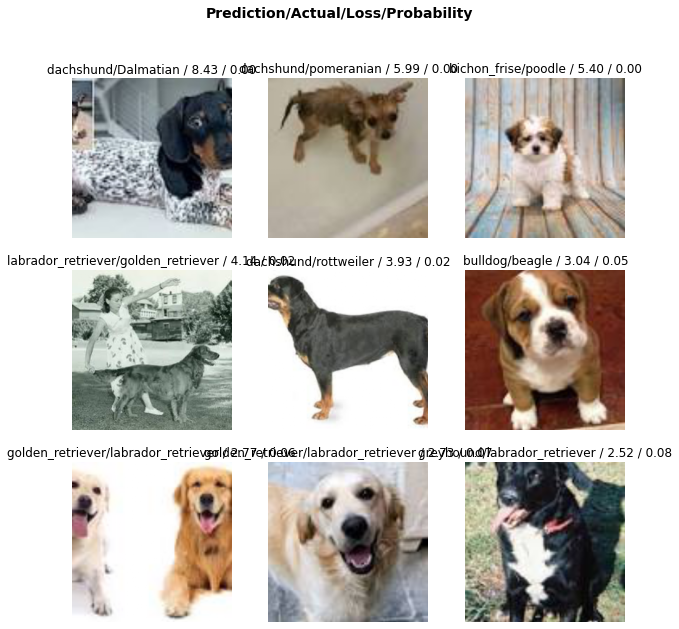

In [27]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

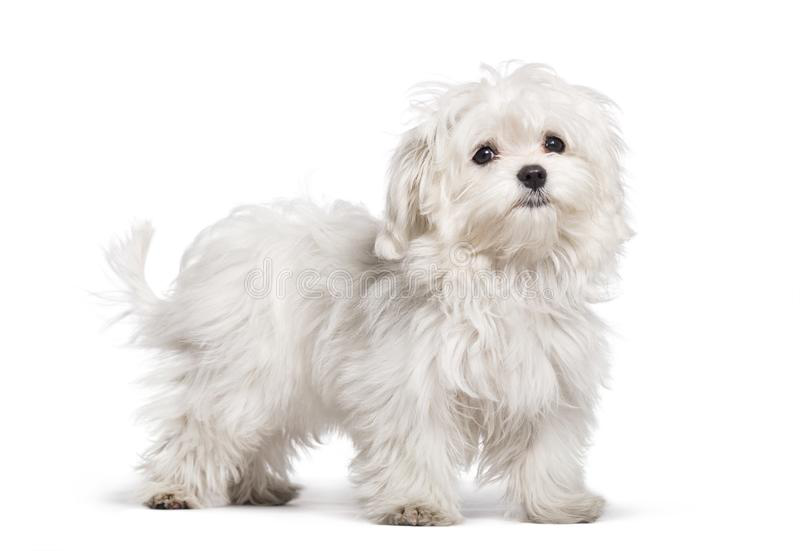

In [28]:
img_maltese= open_image(Path(root_path)/'test_images'/'maltese.jpg')
img_maltese
#img_bulldog= open_image(Path(root_path)/'test_images'/'bulldog.jpg')
#img_bulldog
#img_dobermann= open_image(Path(root_path)/'test_images'/'dobermann.jpg')
#img_dobermann

In [34]:
pred_class,pred_idx,outputs = learn.predict(img_maltese)
pred_class
#pred_class,pred_idx,outputs = learn.predict(img_bulldog)
#pred_class
#pred_class,pred_idx,outputs = learn.predict(img_dobermann)
#pred_class


Category tensor(10)

In [33]:
tensor(10)

tensor(10)